In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def generate_labels_data(data_dict):
    # Data to plot
    labels = []
    sizes = []

    for x, y in data_dict.items():
        labels.append(x)
        sizes.append(y)
    return labels, sizes


## Task 4. Real Epidemiology data
How can we calculate the number of actually sick people? 
Can you extract this information for your country from the files.

The number of actually confirmed people in Hungary on 8/4/21: 809,731
The number of actually recovered people in Hungary on 8/4/21: 749,773
The number of actually dead people in Hungary on 8/4/21: 30,032
----
The number of actually sick people in Hungary on 8/4/21: 29,926


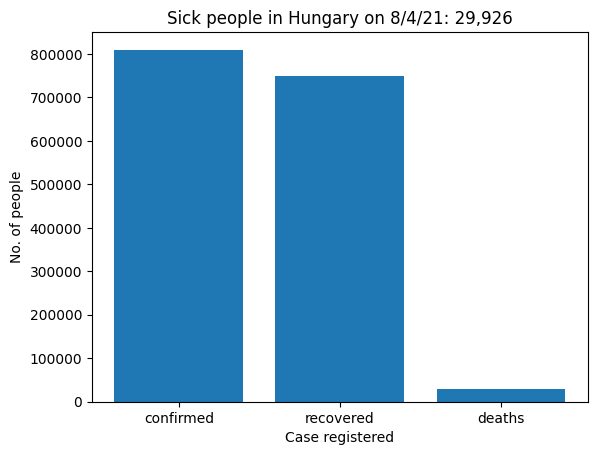

In [21]:
def last_data(url:str, selected_country:str, selected_date:str):
    df = pd.read_csv(url)
    df = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
        var_name="Date", 
        value_name="Value")
    df.sort_values(by=['Value'])
    df2 = df[(df["Date"]==selected_date) & (df["Country/Region"] == selected_country)] 
    max = df2['Value'].groupby(df2["Date"]).sum().max()
    return max, df2


confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

selected_country = "Hungary"
selected_date = "8/4/21" # The last day when recovered cases was administrated
confirmed, confirmed_df = last_data(confirmed_url, selected_country, selected_date)
deaths, deaths_df = last_data(deaths_url, selected_country, selected_date)
recovered, recovered_df = last_data(recovered_url, selected_country, selected_date)

sick = confirmed - deaths - recovered

print("The number of actually confirmed people in " + selected_country + " on "+selected_date+":", f"{confirmed:,}")
print("The number of actually recovered people in " + selected_country + " on "+selected_date+":", f"{recovered:,}")
print("The number of actually dead people in " + selected_country + " on "+selected_date+":", f"{deaths:,}")
print("-"*4)
print("The number of actually sick people in " + selected_country + " on "+selected_date+":", f"{sick:,}")


covid_dict = {
    "confirmed": confirmed,
    "recovered": recovered,
    "deaths": deaths
}

covid_labels, covid_sizes = generate_labels_data(covid_dict)
# Plot
plt.bar(covid_labels, covid_sizes)
 
plt.xlabel("Case registered")
plt.ylabel("No. of people")
title = "Sick people in " + selected_country + " on "+selected_date+": " + f"{sick:,}"
plt.title(title)
plt.show()


## Task 5. Running cost for your experiment. 

You got a file from your usual supplier which is a text file. 
The first row is just a header with "Reagent name Price Quantity" 
From the second row there are the reagents this supplier has in store. The columns are delimitered by a TAB. The file is supplierprices.txt 

You need: 
- 100 liters of distilled water 
- 1000 liters of alcohol (96%) 
- 5 kg of rabbit litter 
- 50 g of fruit fly food 

The price of distilled water: 1000 USD
--------------------------------------------------
The price of alcohol (96%): 30000 USD
--------------------------------------------------
The price of rabbit litter: 65 USD
--------------------------------------------------
The price of fruit fly food: 900 USD
--------------------------------------------------


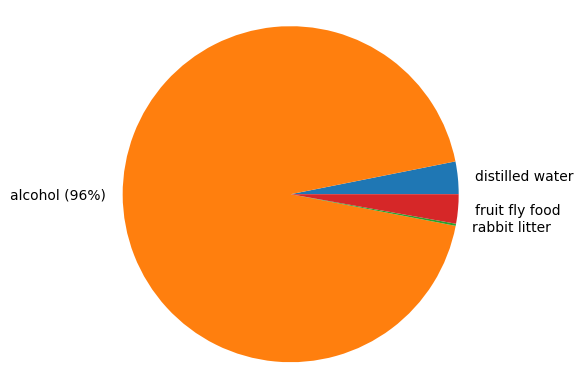

In [23]:
df = pd.read_csv("supplierprices.txt", sep='\t')


needs = {
    "distilled water":100,
    "alcohol (96%)": 1000,
    "rabbit litter": 5,
    "fruit fly food":50
    }

needs_price = 0
needs_with_price = {}
for n in needs:
    df2 = df[df["Reagent name"]==n]
    price = df2["Price Quantity"].min() * needs[n]
    print("The price of " + n +": "+ str(price) + " USD")
    needs_price += price
    print("-"*50)
    needs_with_price[n] = price


# Data to plot
label_needs, prices = generate_labels_data(needs_with_price)

# Plot
plt.pie(prices, labels=label_needs)

plt.axis('equal')
plt.show()
